In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme('poster')
%config InlineBackend.figure_format = 'retina'

import os
from lmfit.models import LinearModel#,VoigtModel,SplineModel,LinearModel
from peak_fitting import peak_fitting
# from scipy.signal import find_peaks
import astropy.units as u
from roentgen.lines import get_lines

In [16]:
def open_mca_data(file_name):
    with open(file_name, 'r', encoding='ansi') as file:
        content = file.readlines()
    data = False
    datas = []
    for i in content:
        if i =='<<END>>\n':
            data = False
        if data:
            datas.append(eval(i))
        if i =='<<DATA>>\n':
            data = True
    datas = np.array(datas)
    return datas

# Best shaping time

In [17]:
shaping_raw_datas = os.listdir('raw_data/')[2:16]
shaping_datas_dic = {eval(i.split('.')[0][2:].replace('_','.'))
                     :open_mca_data('raw_data/'+i) 
                     for i in shaping_raw_datas}
shaping_datas = pd.DataFrame(shaping_datas_dic)
shaping_datas = shaping_datas.sort_index(axis=1)
shaping_datas

,0.8,2.4,4.0,5.6,8.0,11.2,16.0,22.4,25.6,32.0,44.8,64.0,89.6,102.4
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1020,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1021,0,0,0,1,0,0,0,0,1,0,1,0,0,1
1022,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [18]:
shaping_datas.drop(index = [i for i in range(150)], inplace=True)
shaping_datas

,0.8,2.4,4.0,5.6,8.0,11.2,16.0,22.4,25.6,32.0,44.8,64.0,89.6,102.4
150,2,1,1,2,0,1,1,0,0,1,0,1,2,0
151,1,0,1,1,0,3,0,1,0,2,0,1,1,0
152,2,2,0,1,0,2,2,1,0,0,3,0,0,0
153,0,2,1,0,2,0,1,0,0,0,4,0,2,0
154,2,0,2,0,0,0,1,0,0,2,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1020,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1021,0,0,0,1,0,0,0,0,1,0,1,0,0,1
1022,0,0,0,0,0,0,0,0,0,0,1,0,0,0


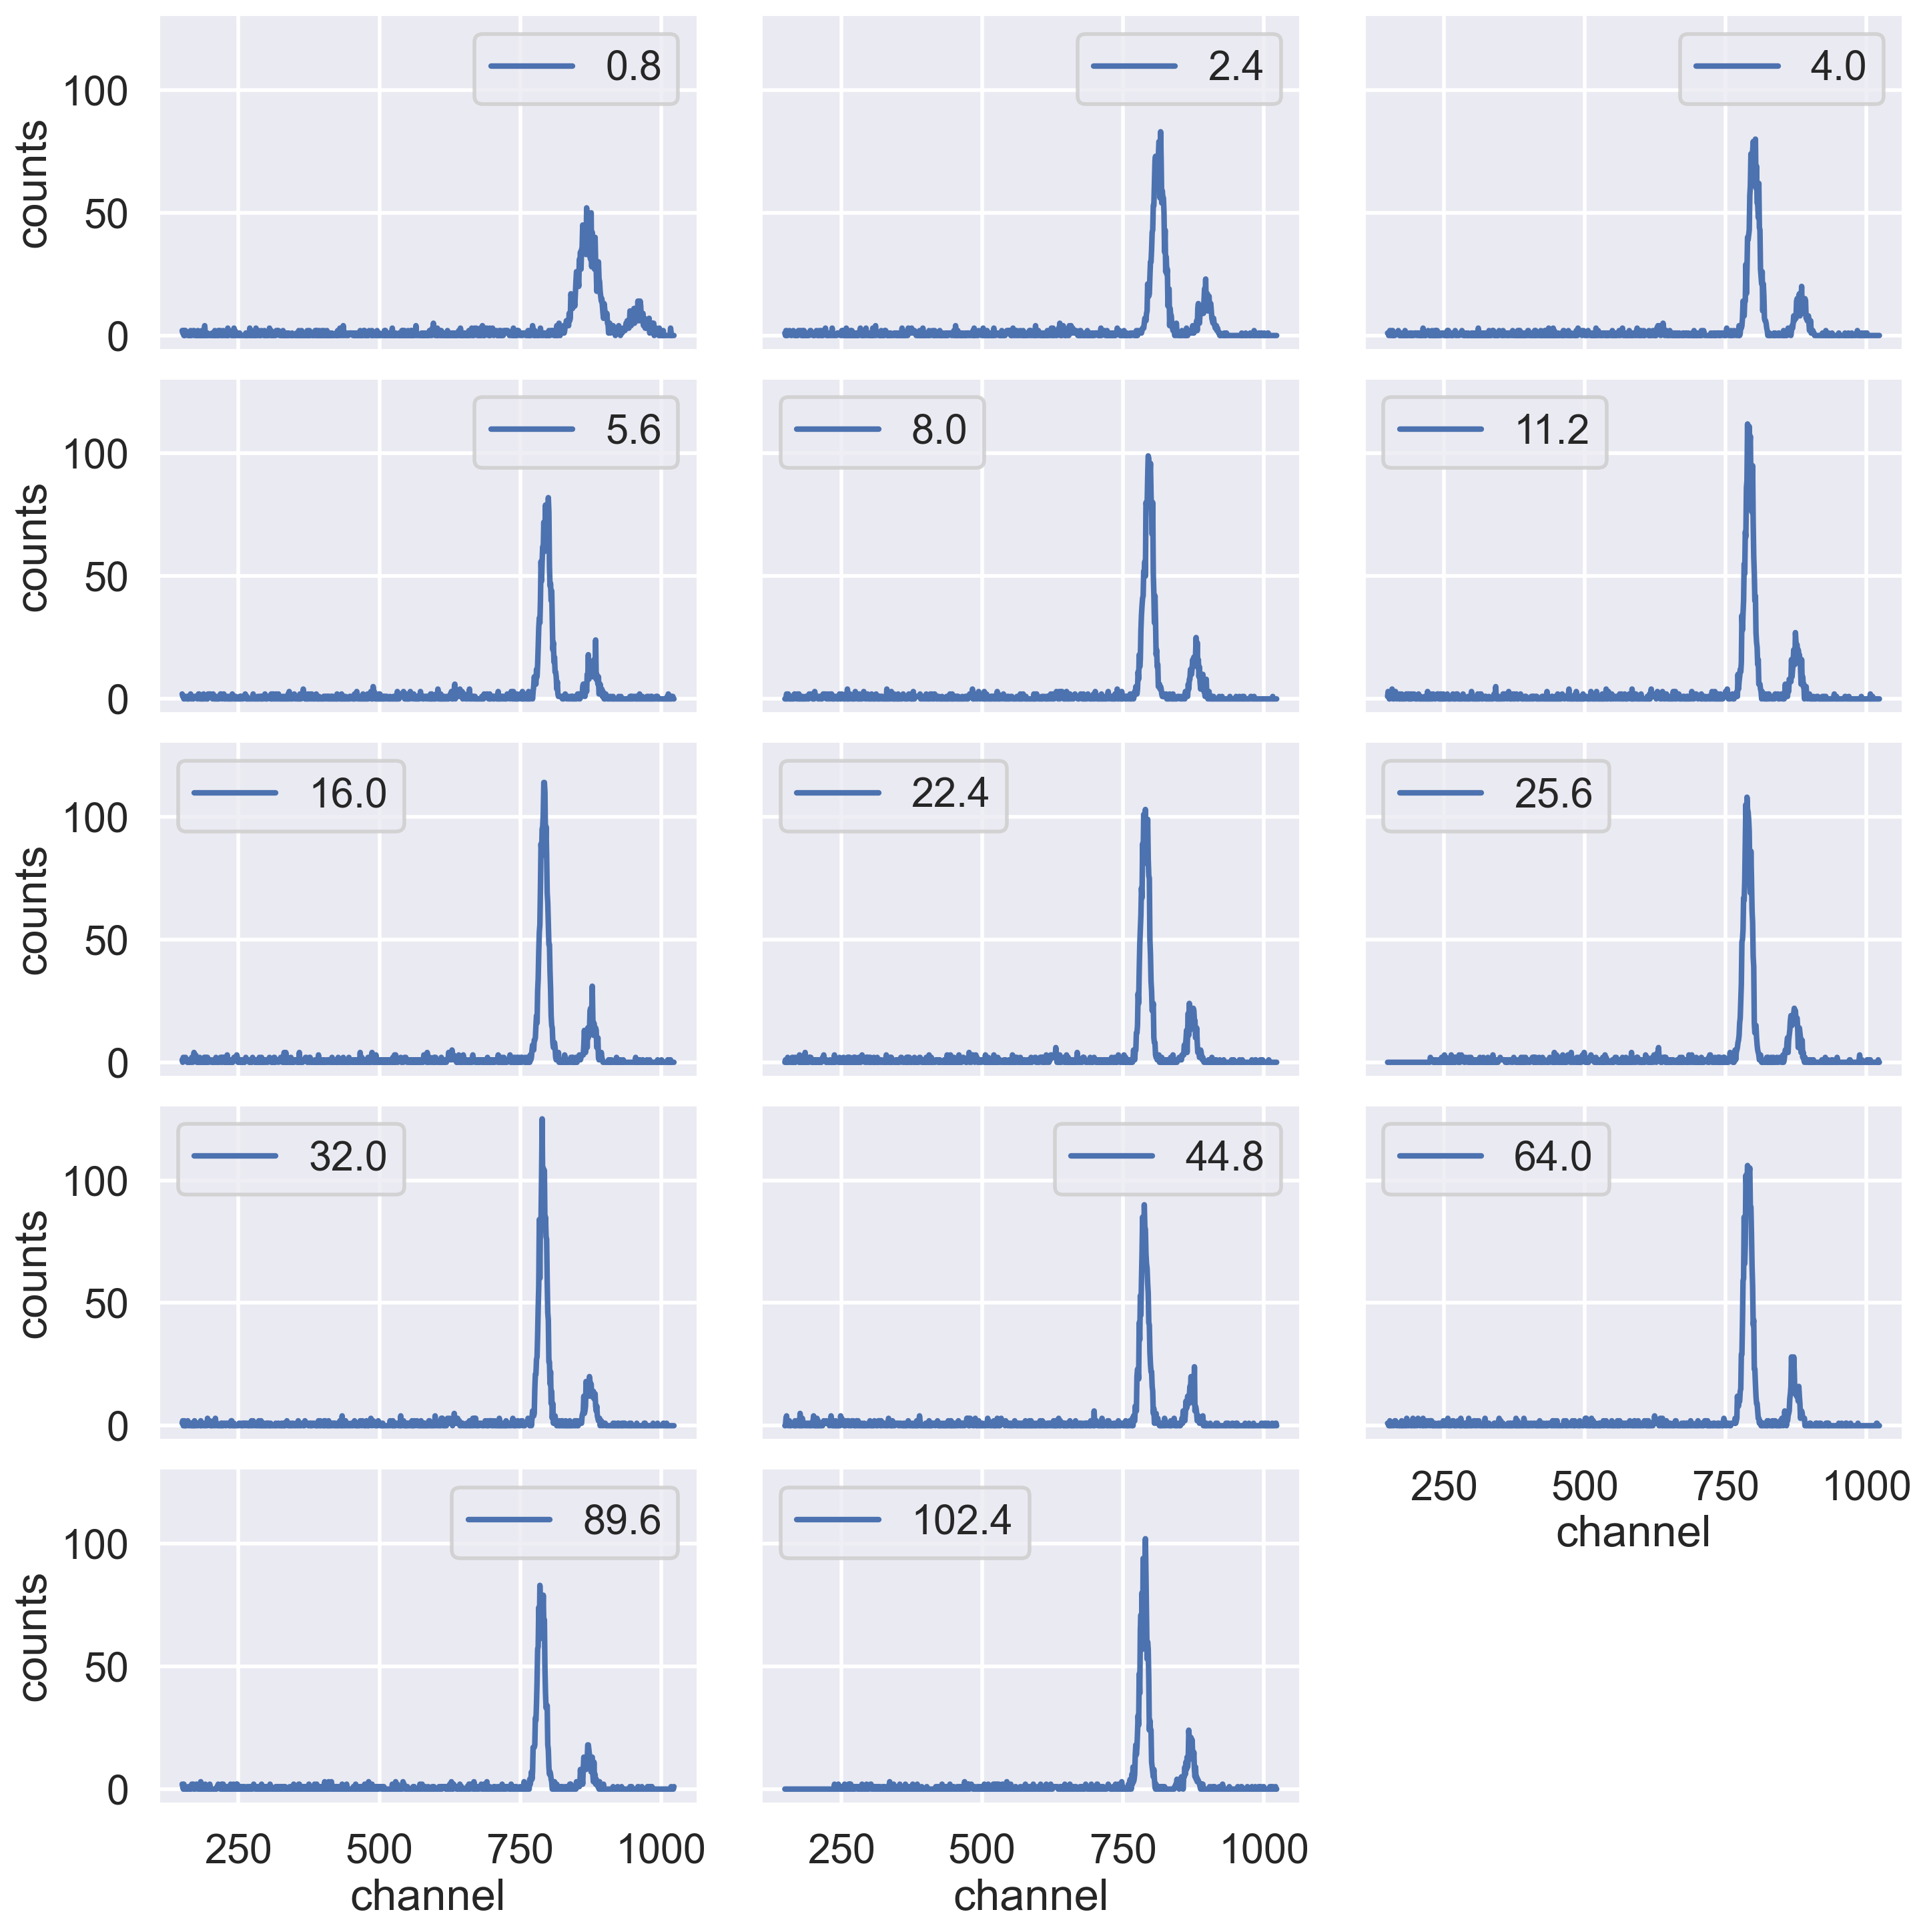

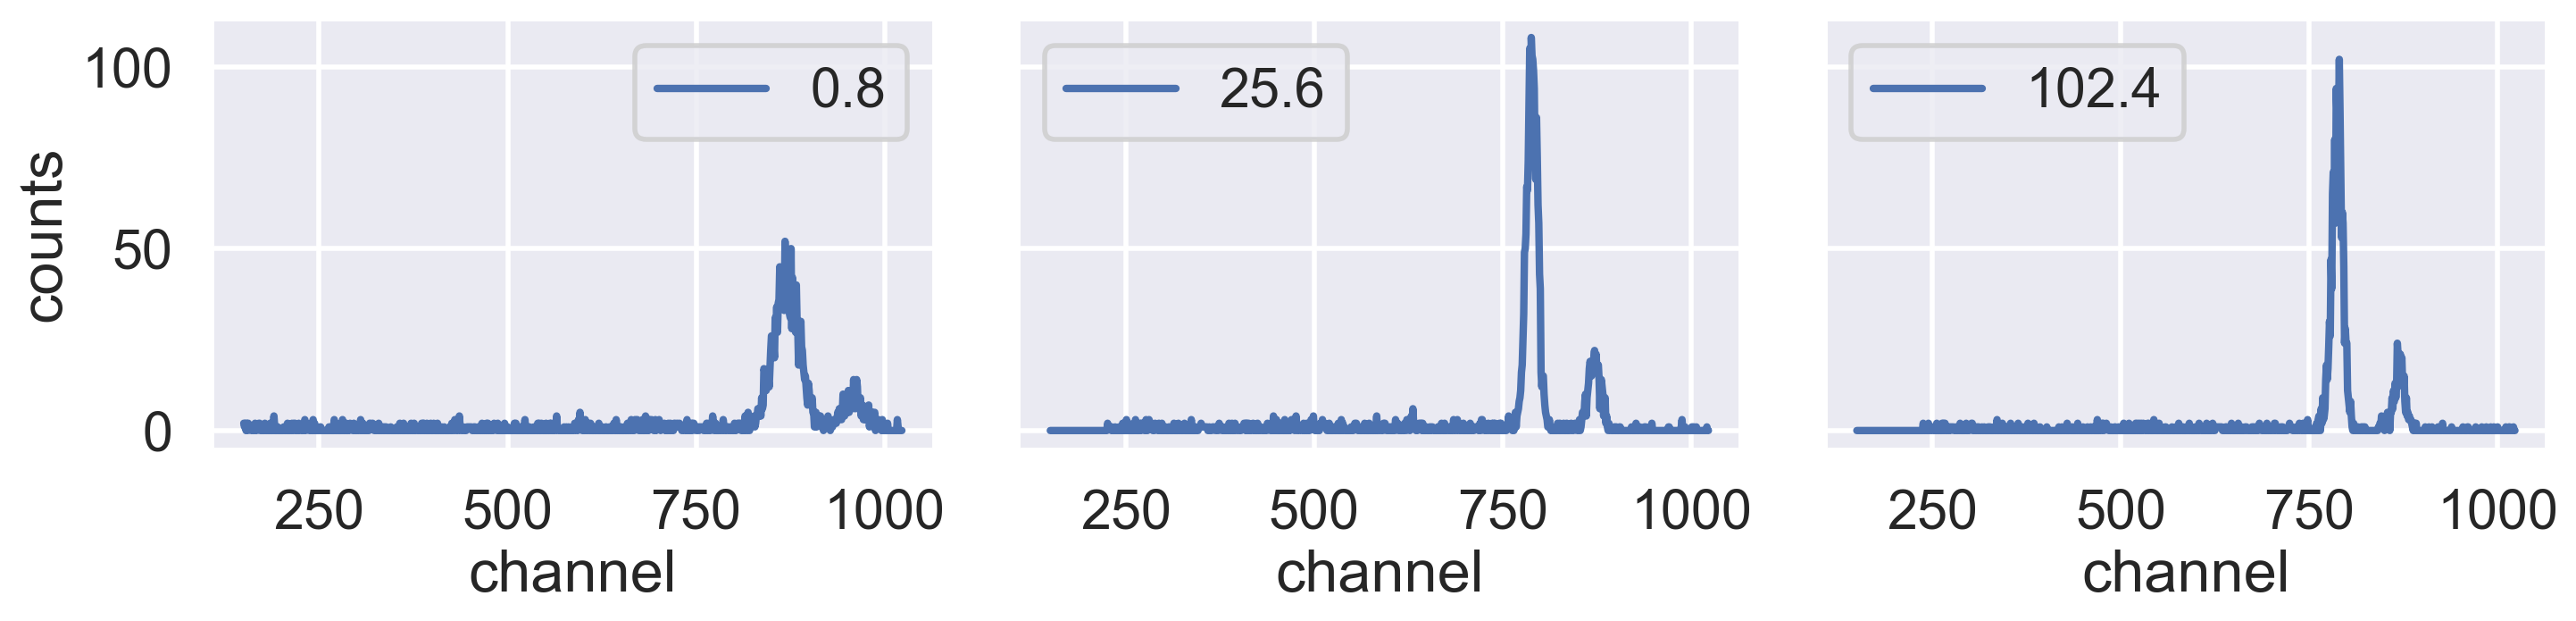

In [19]:
axes = shaping_datas.plot(subplots=True, layout = (5,3) , figsize=(15,15),
                          color = 'b', sharex= True, sharey= True,
                          xlabel='channel', ylabel='counts')

display_cols = [0.8,25.6,102.4]
display_axes = shaping_datas.plot(y = display_cols,subplots=True, layout = (1,3) ,
                                  figsize=(15,4),color = 'b', sharex= True, sharey= True,
                                  xlabel='channel', ylabel='counts')
axes = axes.flatten()
display_axes = display_axes.flatten()
fig = axes[0].get_figure()
display_fig = display_axes[0].get_figure()
fig.tight_layout(h_pad=-2)
display_fig.tight_layout()

2 0.9447208352189325
2 0.9731247839938868
2 0.9744760410852749
2 0.969259466653237
2 0.9767326896543488
2 0.9759486675581089
2 0.9845092920962423
2 0.9799678485183049
2 0.9803918771613669
2 0.9797024883565038
2 0.9734961562720047
2 0.9819219093165752
2 0.9755083761842049
2 0.9700113009760236


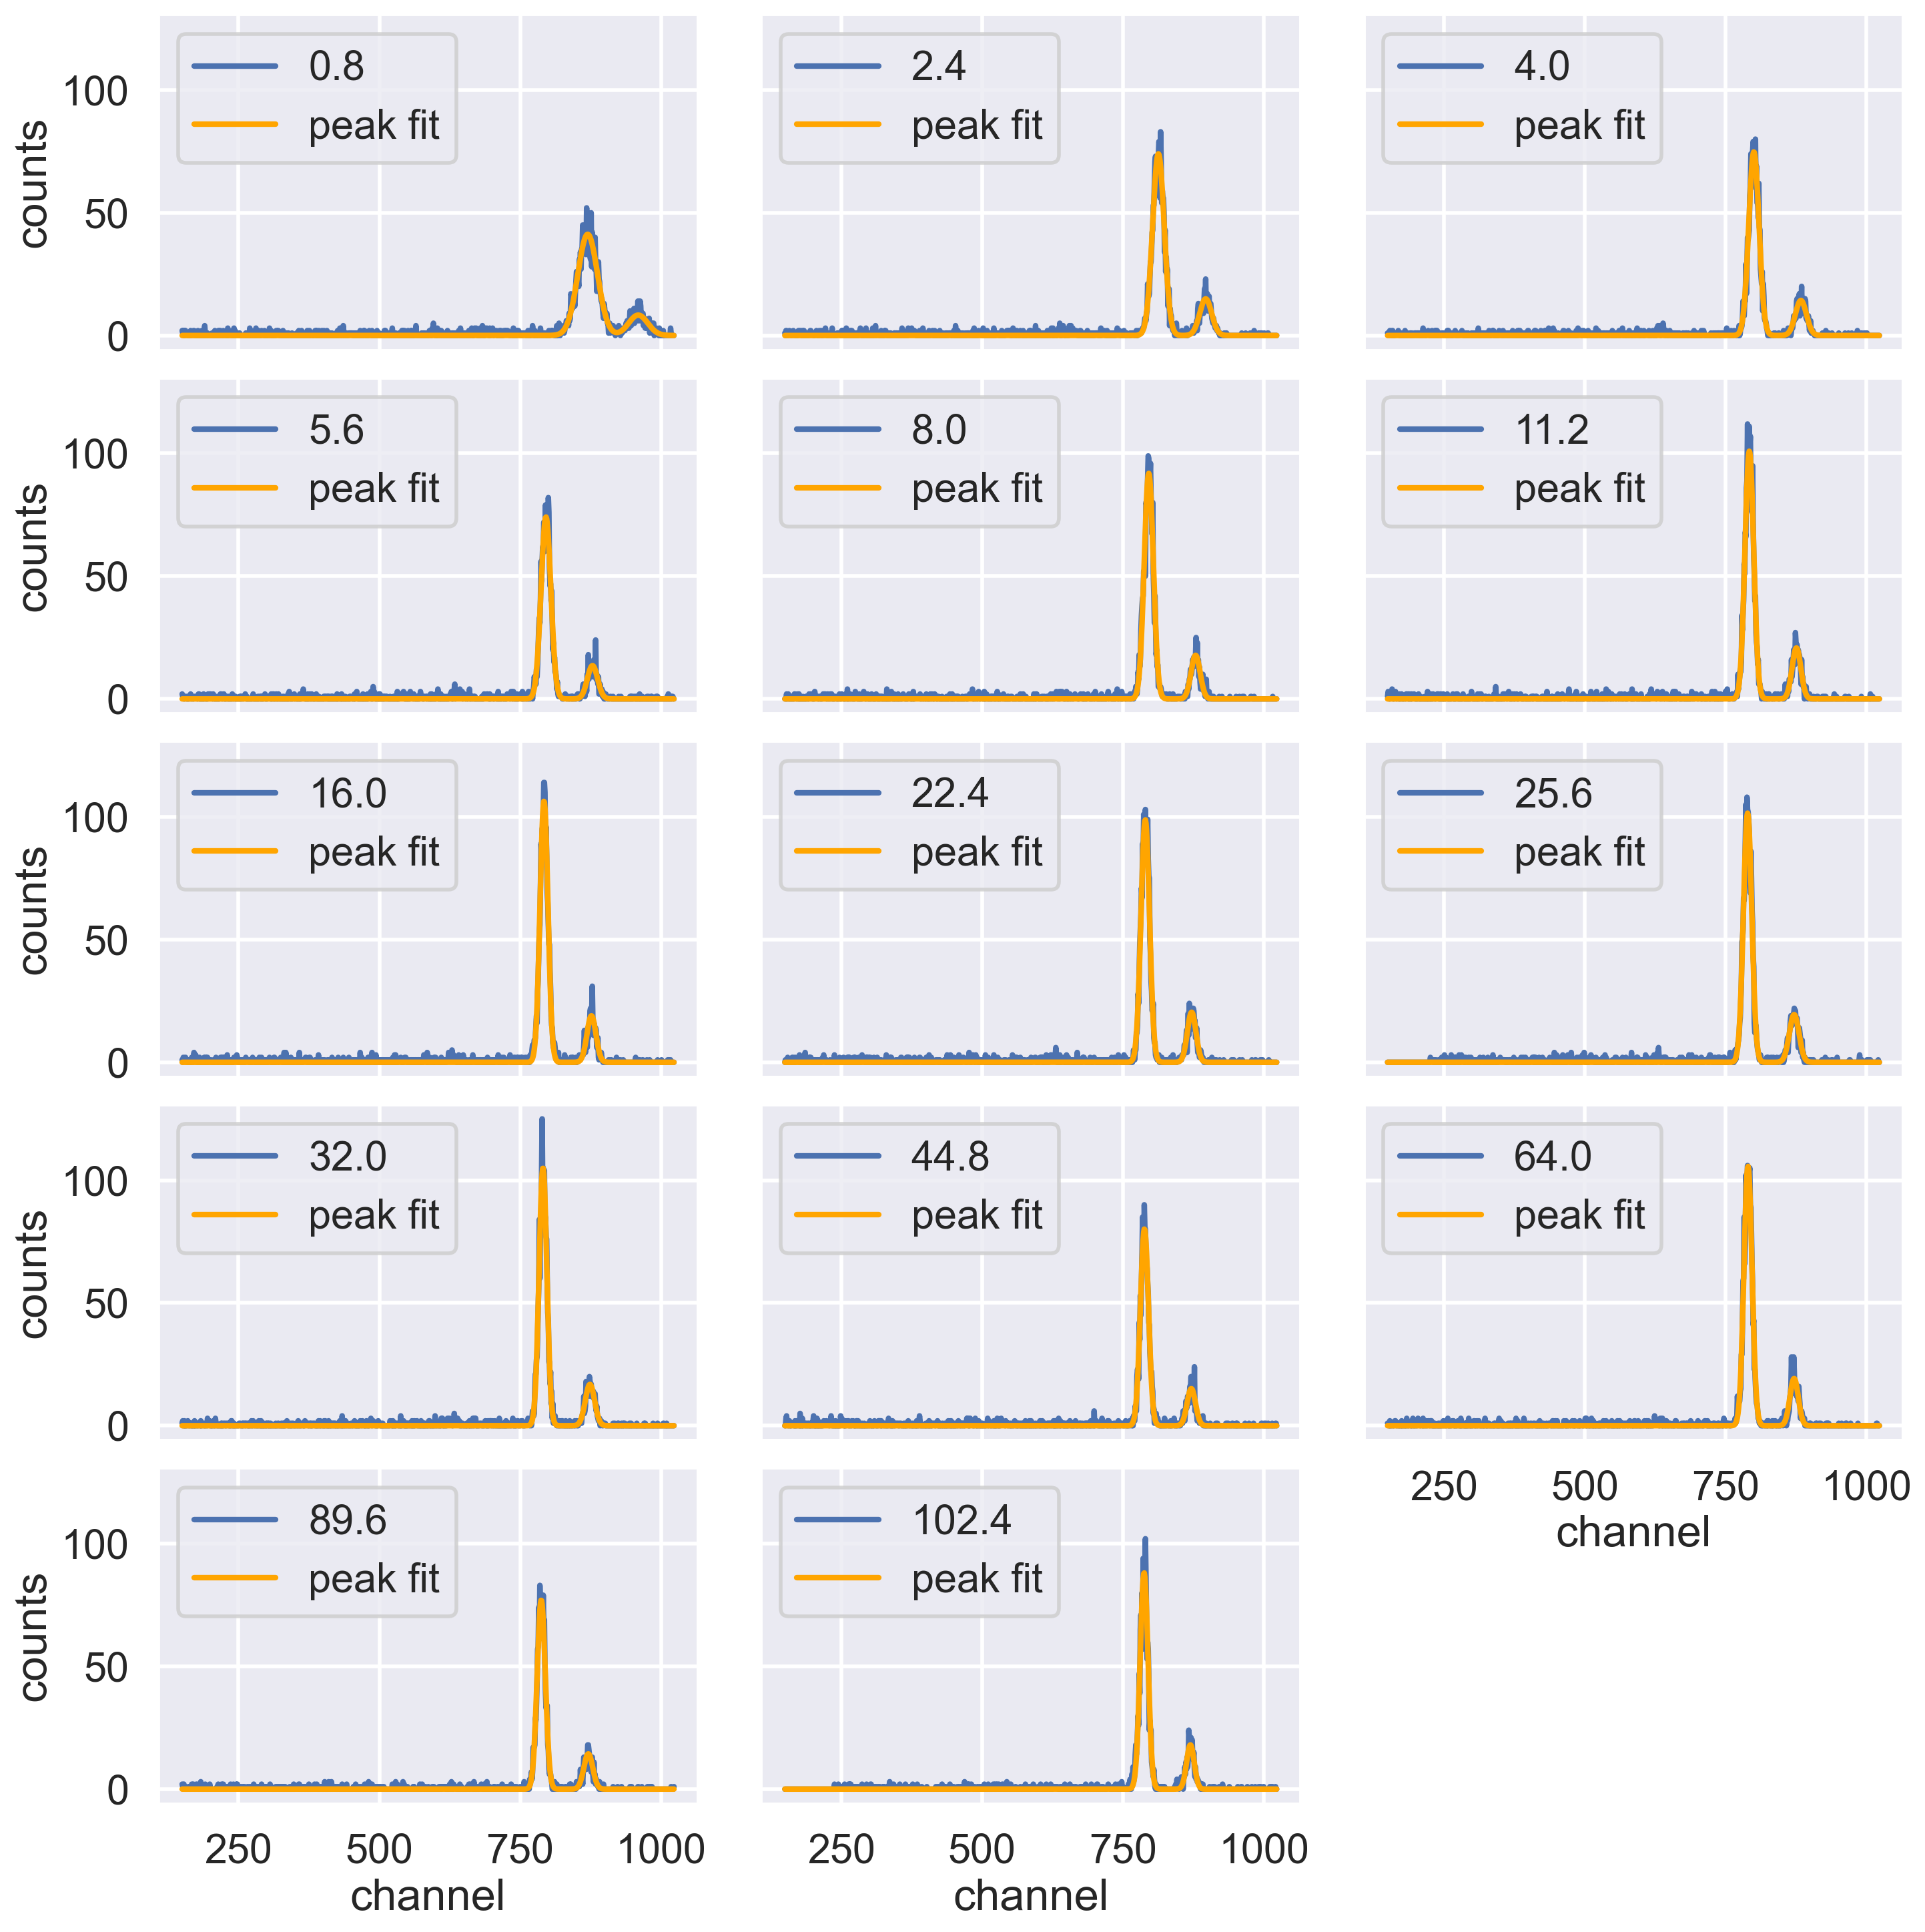

In [20]:
centers = []
fwhms = []
display_index = 0
for col,ax in zip(shaping_datas.columns,axes):
    # peaks,info = find_peaks(shaping_datas[col],prominence=10,distance=40)
    # ax.scatter(peaks+150,shaping_datas[col][peaks+150],marker= 'x')
    # print(col,len(peaks))
    fit_result,num_peak = peak_fitting(shaping_datas[col].values,
                                       xdata = shaping_datas.index.values ,
                                       prominence=10,distance=40,
                                       plotting=False)
    print(num_peak,fit_result.summary()['rsquared'])
    ax.plot(shaping_datas.index.values,fit_result.eval(),color = 'orange',label = 'peak fit')
    ax.legend(loc = 'upper left')
    if col in display_cols:
        display_axes[display_index].plot(shaping_datas.index.values,
                                         fit_result.eval(),
                                         color = 'orange',label = 'peak fit')
        display_axes[display_index].legend(loc = 'upper left')
        display_index += 1

    centers.append(fit_result.params['G0_center'].value)
    fwhms.append(fit_result.params['G0_fwhm'].value)
fig

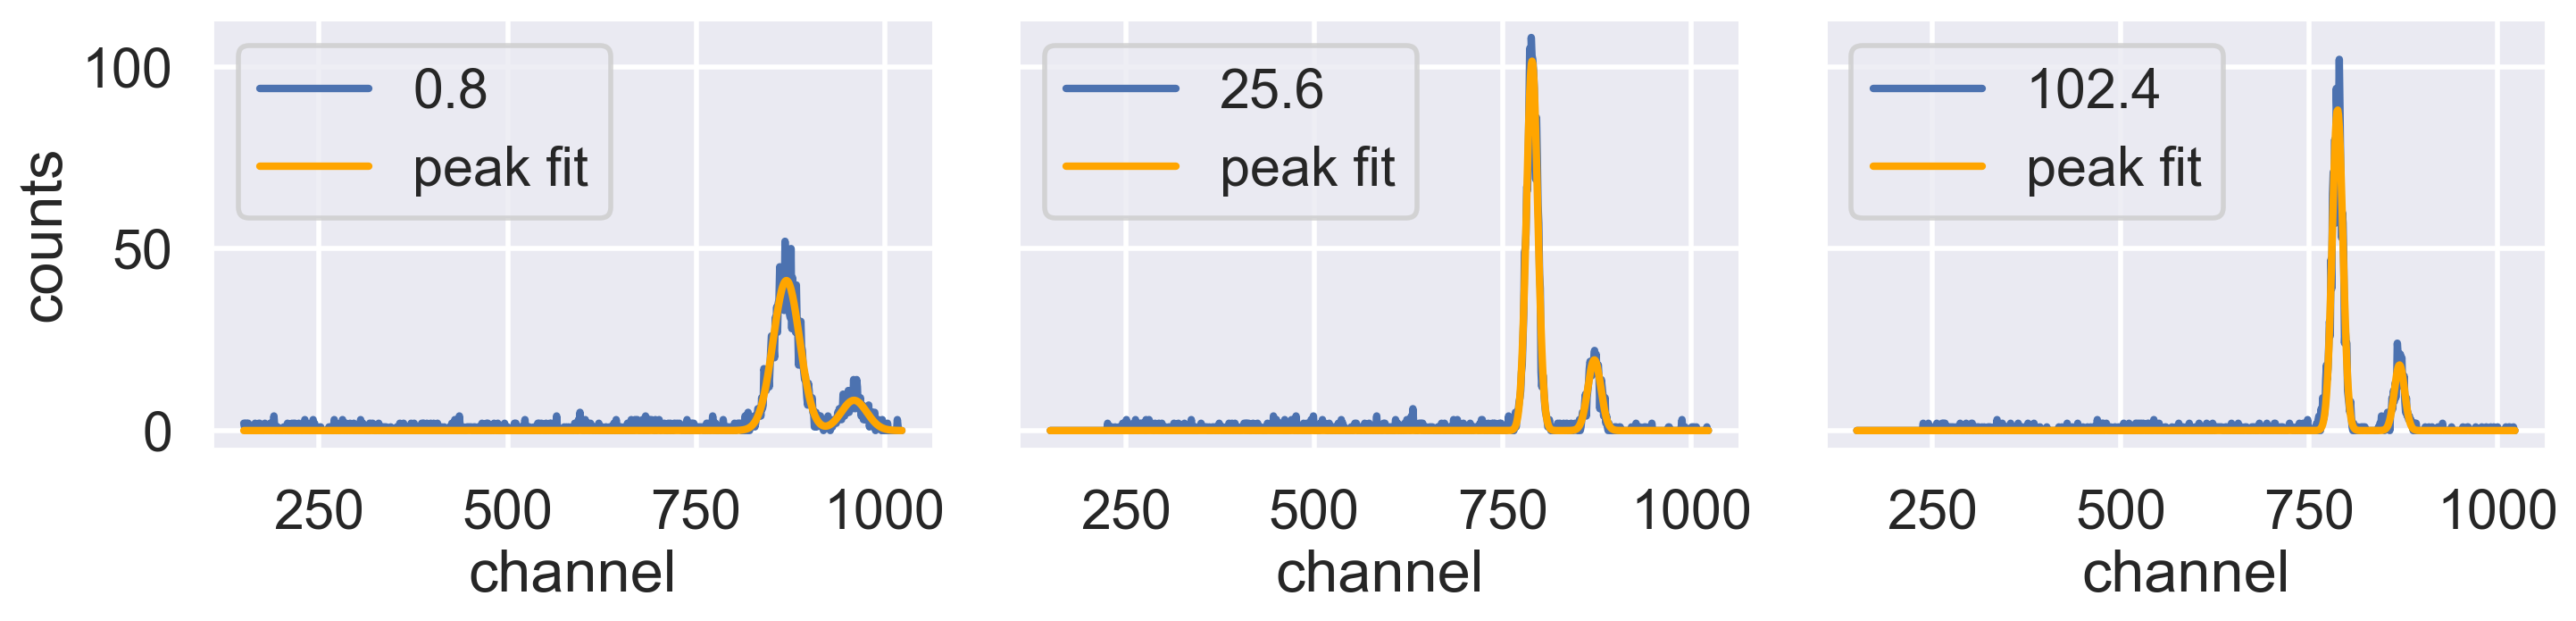

In [21]:
display(display_fig)
display_fig.savefig('figs/'+'shaping_time_fitting.pdf')

In [22]:
gaussian_fit_result = pd.DataFrame({'param':shaping_datas.columns,
                                    'center':centers,
                                    'fwhm':fwhms})
gaussian_fit_result['resolution(%)'] = gaussian_fit_result['fwhm']/gaussian_fit_result['center']*100
gaussian_fit_result

,param,center,fwhm,resolution(%)
0,0.8,869.876593,41.233173,4.740118
1,2.4,813.048971,24.237431,2.981054
2,4.0,800.268448,21.385251,2.672260
3,5.6,795.763012,20.507714,2.577113
4,8.0,795.981819,19.090880,2.398406
5,11.2,792.177022,18.207343,2.298393
6,16.0,792.329666,16.562334,2.090334
7,22.4,789.728727,17.815499,2.255901
8,25.6,789.111870,17.457667,2.212318
9,32.0,790.506838,16.215431,2.051270


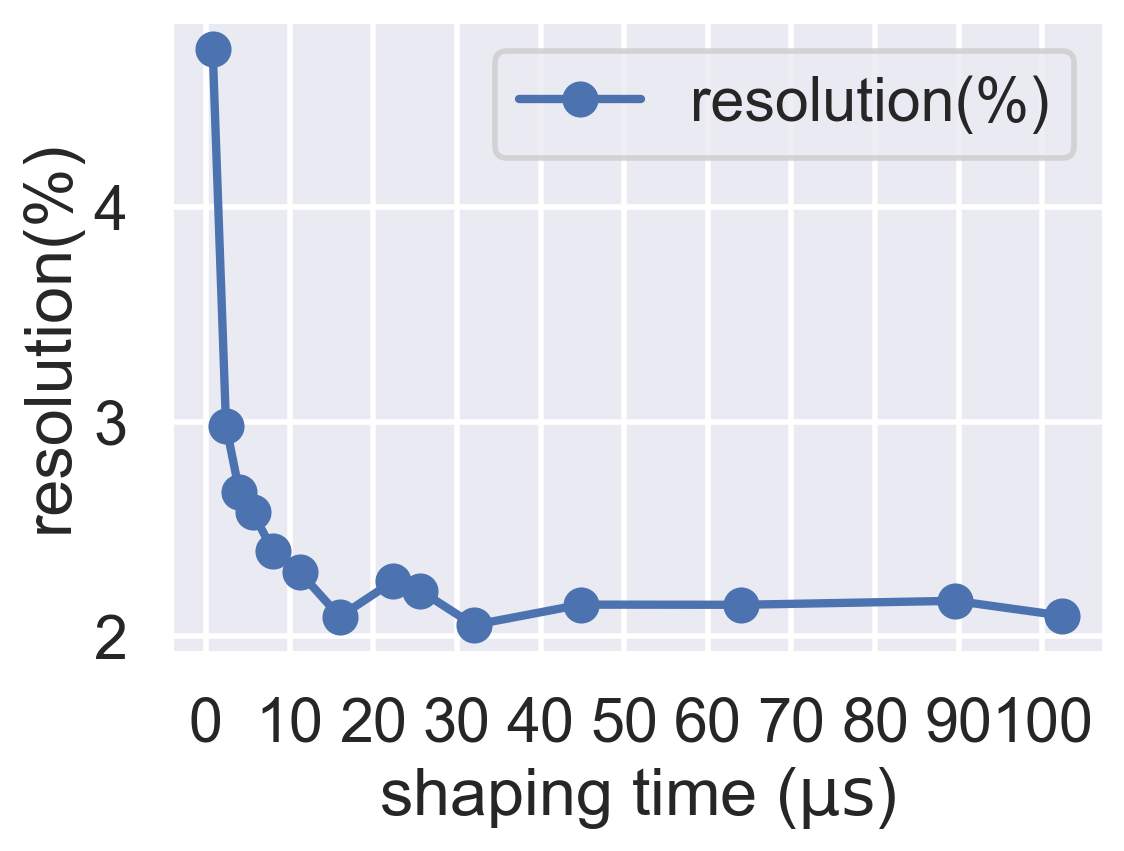

In [23]:
ax = gaussian_fit_result.plot(x = 'param',y='resolution(%)',style = '-o')
fig = ax.get_figure()
ax.set_xticks(np.arange(0,101,10))
ax.set_xlabel(r'shaping time ($\rm \mu s$)')
ax.set_ylabel(r'resolution(%)')
ax.legend()
fig.tight_layout()
fig.savefig('figs/' + 'resolution-shappingtime.pdf')

# Element_Celebration

In [24]:
elements = ['Tb','Ba','Ag','Mo','Rb']#,'Cu'] 
element_datas = pd.DataFrame({})
for element in elements:
    data = open_mca_data("raw_data\\"+element+'.mca')
    element_datas[element] = data
element_datas

,Tb,Ba,Ag,Mo,Rb
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
1019,0,5,0,0,2
1020,0,1,2,2,1
1021,1,2,3,1,3
1022,2,1,0,2,7


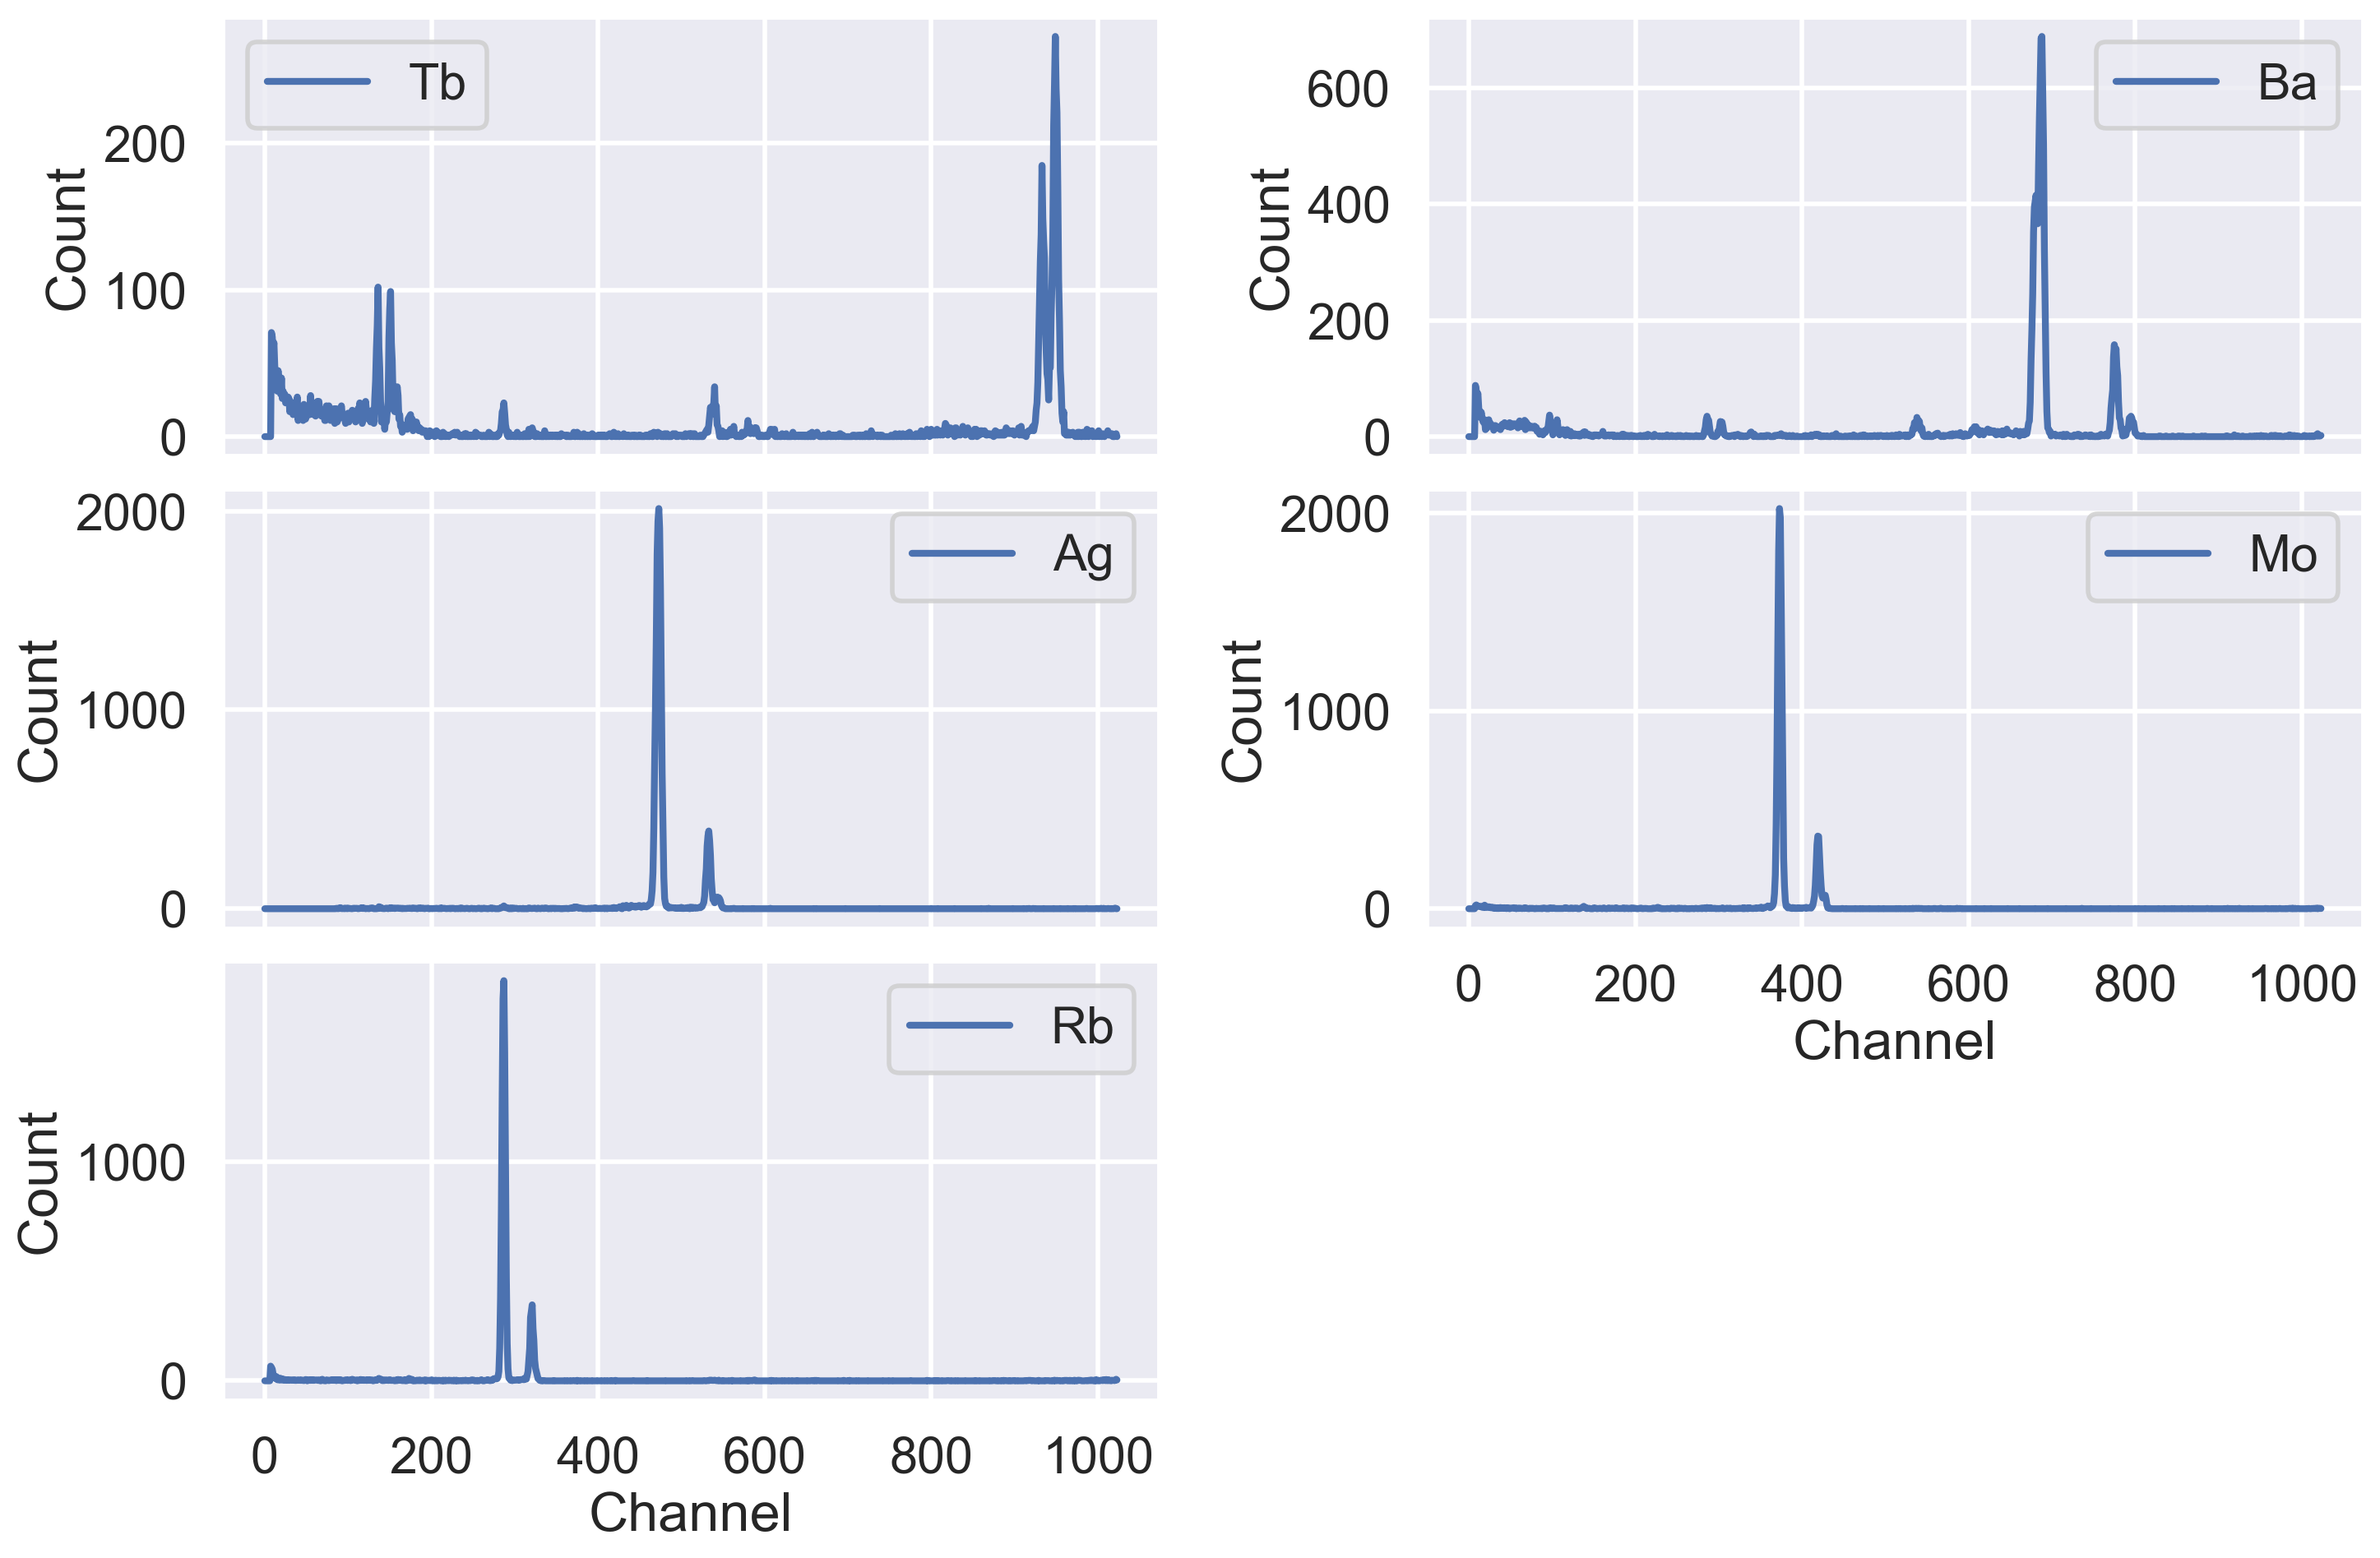

In [79]:
axes = element_datas.plot(subplots=True, layout=(3, 2),figsize=(15, 10),
                          sharex=True,color = 'b',
                          xlabel='Channel',ylabel='Count')
axes = axes.flatten()
fig = axes[0].get_figure()
fig.tight_layout(h_pad=-2)

Tb 2 0.7586096450605909
Ba 2 0.9192772158686962
Ag 2 0.9970011216502003
Mo 2 0.998472030281977
Rb 2 0.9980978947985782


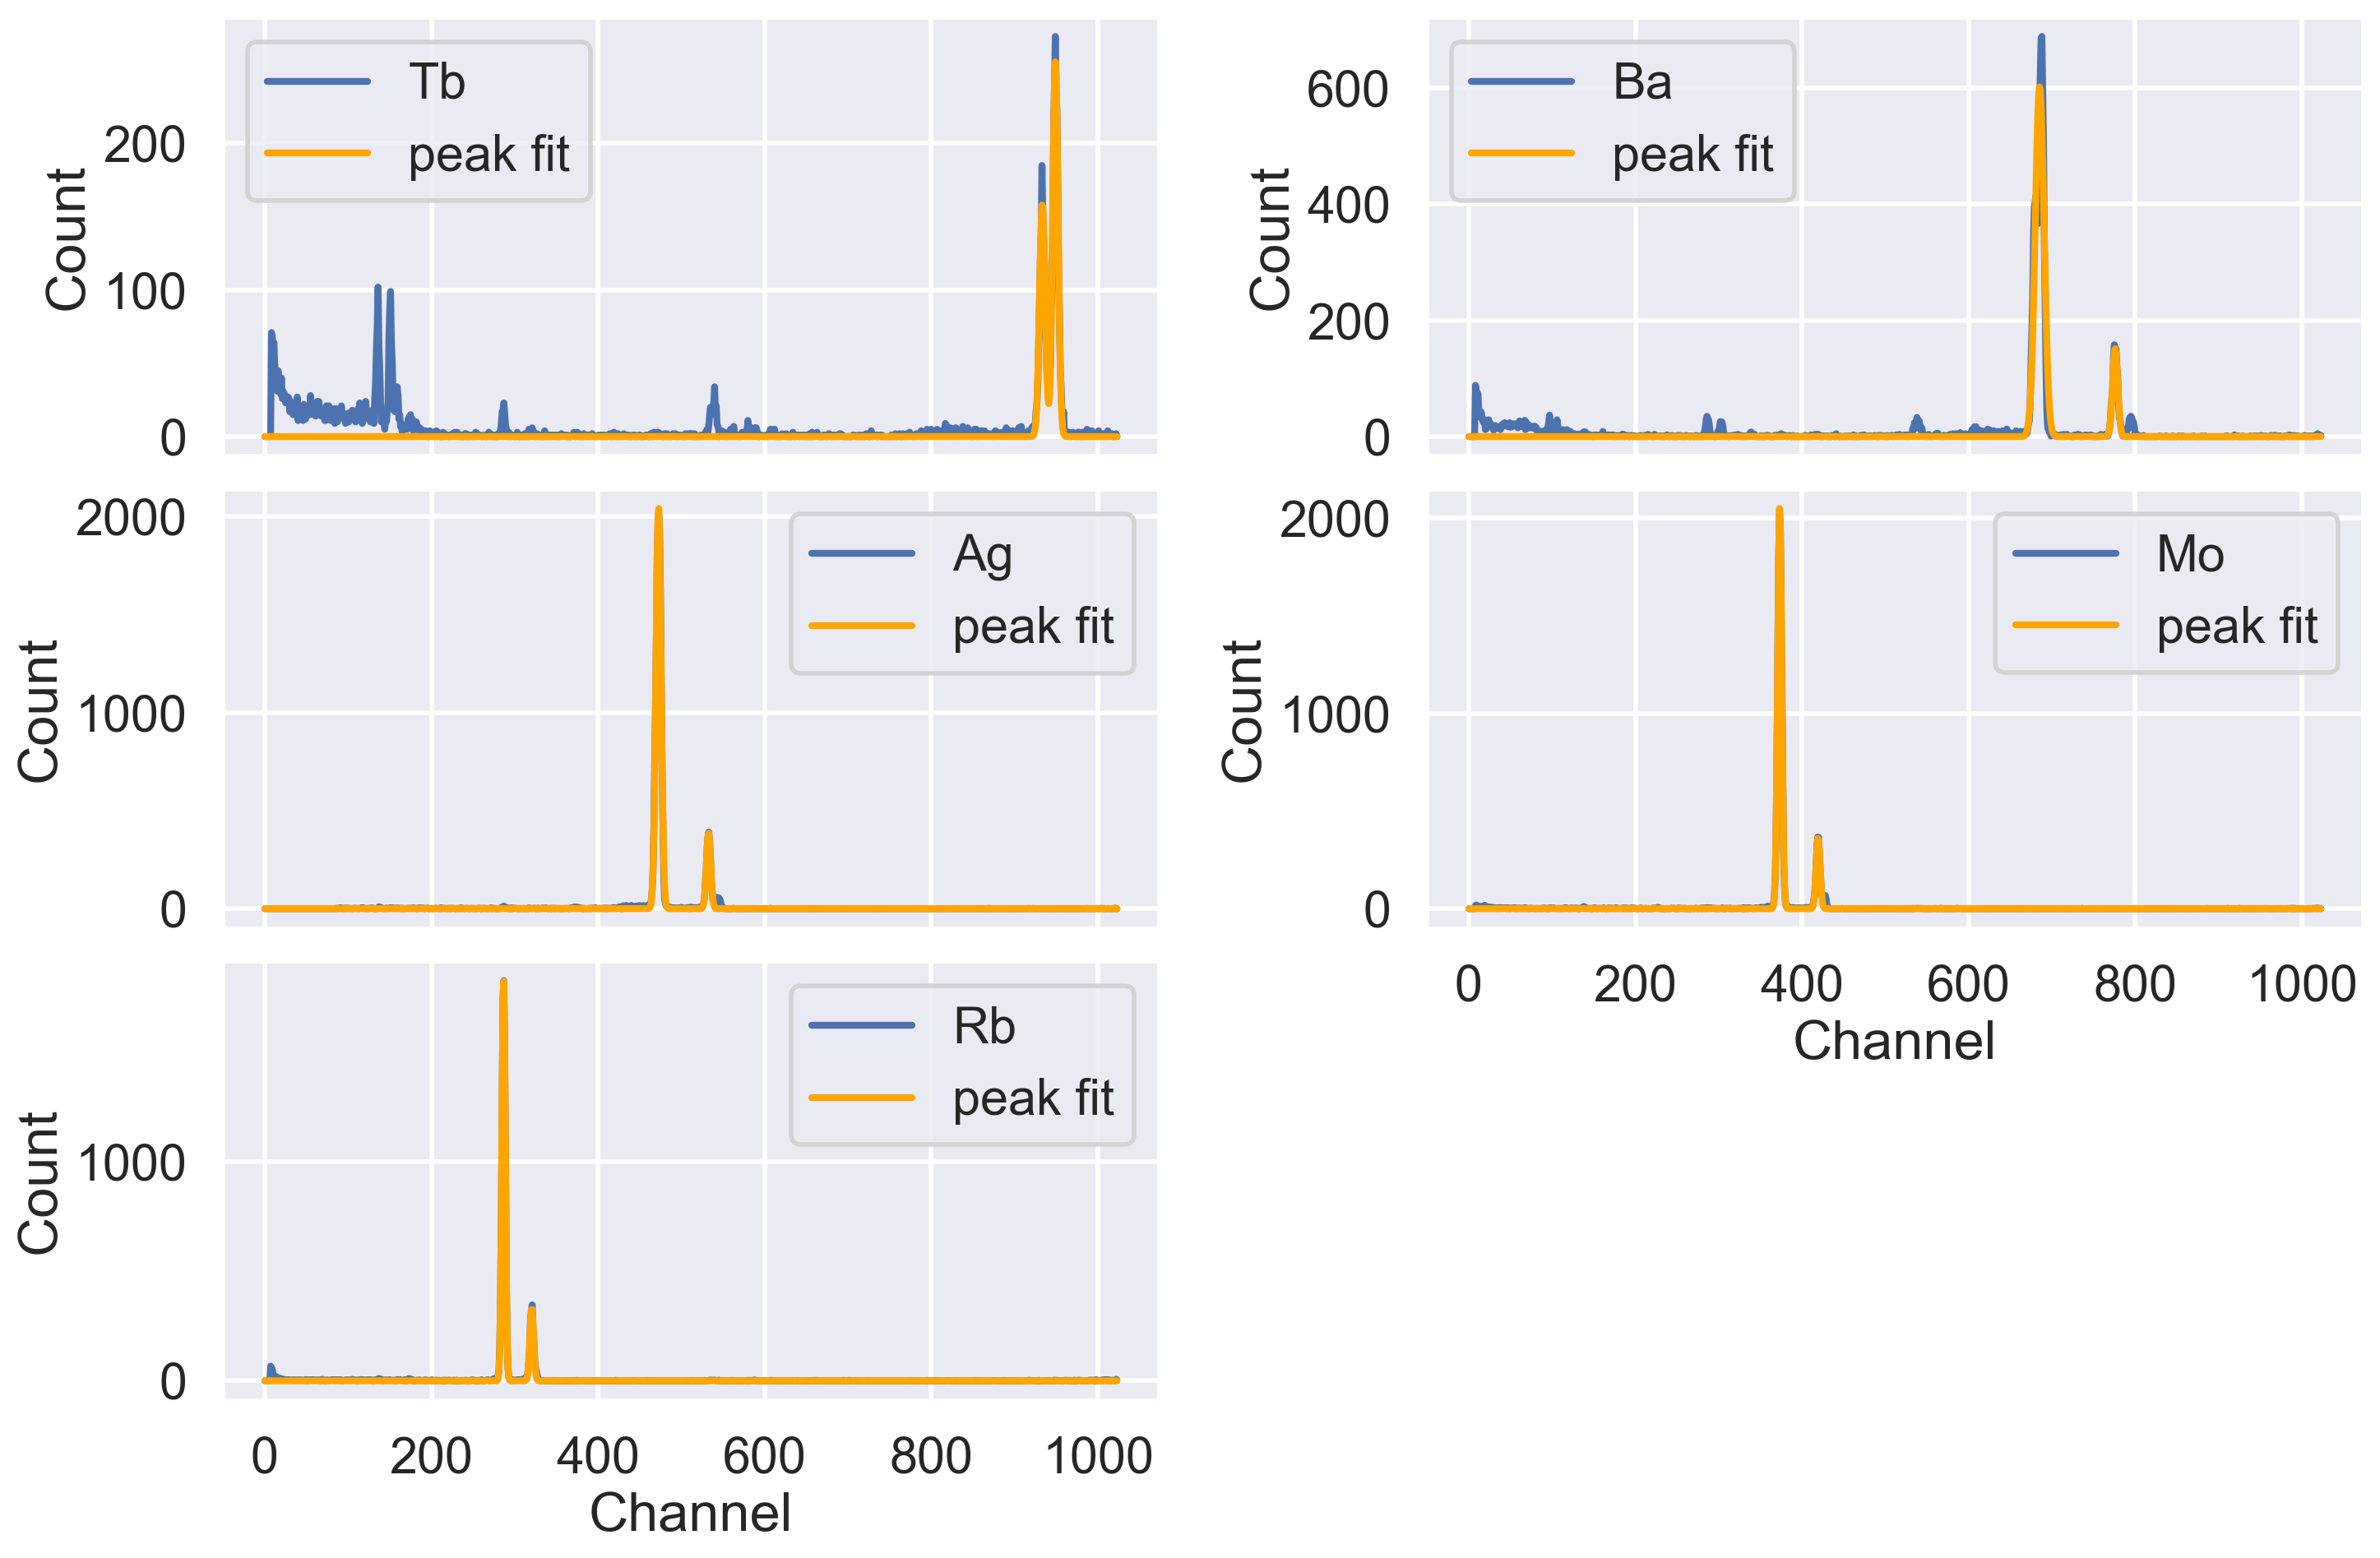

([949.0967490980767,
  685.2941525045626,
  472.6328507727563,
  373.2801378374145,
  286.6693369087031],
 [7.545811405378603,
  12.508351797485343,
  7.185109098236,
  5.680819413473149,
  4.797654086191769])

In [80]:
element_peaks = []
element_fwhms = []
pros = [150,100,100,100,100]
for col,ax,pro in zip(element_datas.columns,axes,pros):
    # peaks,info = find_peaks(element_datas[col],prominence=pro)
    # print(col,peaks)
    # element_peaks.append(peaks[0])
    # ax.scatter(peaks,element_datas[col][peaks],marker= 'x',color = 'orange')

    fit_result,num_peak = peak_fitting(element_datas[col].values,xdata = element_datas.index.values,prominence=pro,plotting=False)
    print(col,num_peak,fit_result.summary()['rsquared'])
    ax.plot(fit_result.eval(),color = 'orange',label = 'peak fit')
    ax.legend()
    # display(fit_result.params)
    # print(fit_result.params['G0_height'].value)
    if fit_result.params['G0_height'].value > fit_result.params['G1_height'].value:
        element_peaks.append(fit_result.params['G0_center'].value)
        element_fwhms.append(fit_result.params['G0_fwhm'].value)
    else:
        element_peaks.append(fit_result.params['G1_center'].value)
        element_fwhms.append(fit_result.params['G1_fwhm'].value)

fig.savefig('figs/'+'element_fitting.pdf')
display(fig)
element_peaks


In [45]:
Ka1enes = []
for ele in elements:
    emit_lines = get_lines(0 * u.keV, 100 * u.keV, element=ele)
    Ka1 = emit_lines['energy'][emit_lines['transition'] == 'Kα1'][0]
    Ka1 = Ka1.to('keV')
    Ka1enes.append(Ka1.value)
Ka1enes

[44.4816, 32.193599999999996, 22.1629, 17.4793, 13.395299999999999]

In [59]:
celebration_result = pd.DataFrame({'element':elements,
                                   'Xray(most)':Ka1enes,
                                   'peak':element_peaks})
celebration_result

,element,Xray(most),peak
0,Tb,44.4816,949.096749
1,Ba,32.1936,685.294153
2,Ag,22.1629,472.632851
3,Mo,17.4793,373.280138
4,Rb,13.3953,286.669337


In [100]:
header = ['元素',r'最强峰(\unit{{keV}})','最强峰(道数)']
formatters = {'Xray(most)':lambda x: f'{x:.2f}',
              'peak':lambda x: f'{x:.1f}'}

print(celebration_result.to_latex(index = False,
                                  header= header,
                                  column_format='c'*len(header),
                                  formatters=formatters,
                                  caption='能量刻度相关参数',
                                  label='tab:celebration_prepare',
                                  position='H'))

\begin{table}[H]
\caption{能量刻度相关参数}
\label{tab:celebration_prepare}
\begin{tabular}{ccc}
\toprule
元素 & 最强峰(\unit{keV}) & 最强峰(道数) \\
\midrule
Tb & 44.48 & 949.1 \\
Ba & 32.19 & 685.3 \\
Ag & 22.16 & 472.6 \\
Mo & 17.48 & 373.3 \\
Rb & 13.40 & 286.7 \\
\bottomrule
\end{tabular}
\end{table}



[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 5
    # variables        = 2
    chi-square         = 0.00573123
    reduced chi-square = 0.00191041
    Akaike info crit   = -29.8563149
    Bayesian info crit = -30.6374391
    R-squared          = 0.99999085
[[Variables]]
    slope:      0.04694646 +/- 8.2005e-05 (0.17%) (init = 1)
    intercept: -0.03738087 +/- 0.04941181 (132.18%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9184


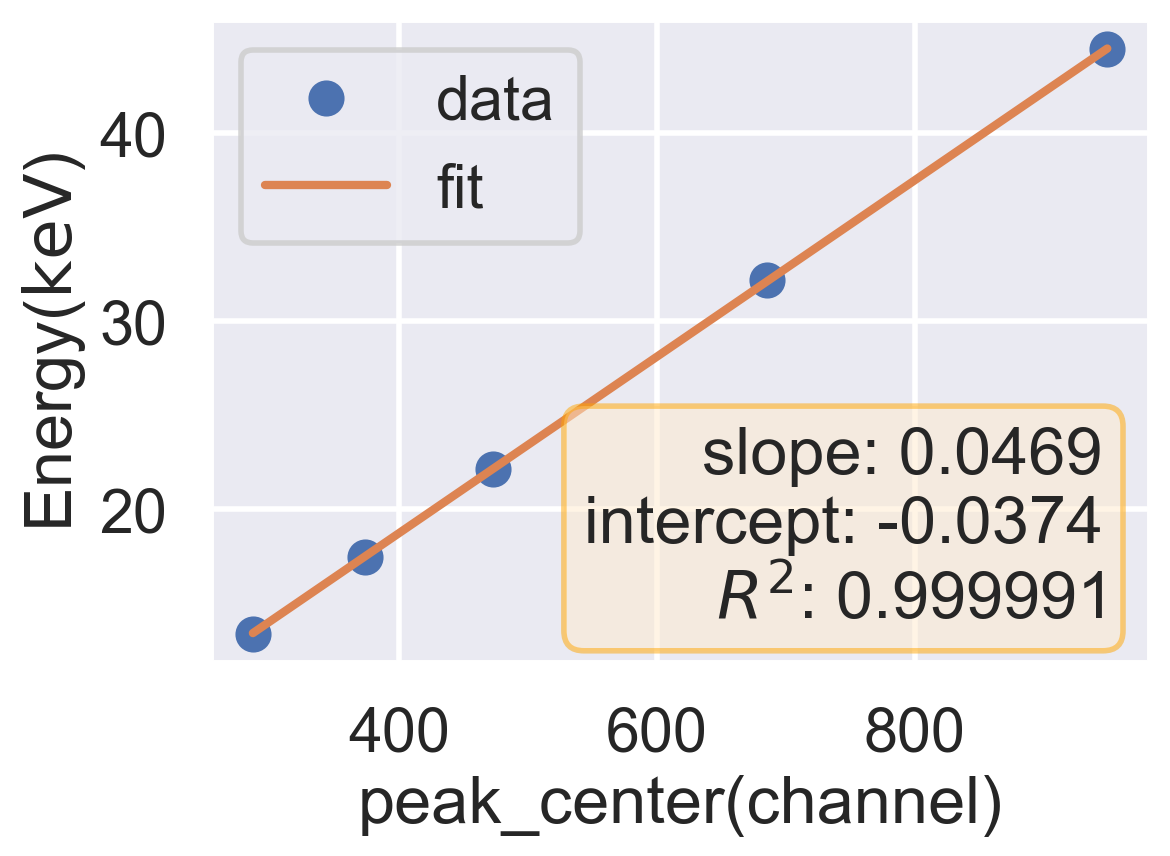

In [99]:
model = LinearModel()
result = model.fit(celebration_result['Xray(most)'].values,
                   x=celebration_result['peak'].values)
# result.plot()
print(result.fit_report())
ax = result.plot_fit(xlabel = 'peak_center(channel)',
                     ylabel = r'Energy($\rm keV$)')
ax.legend(['data', 'fit'])
ax.set_title(None)

# add text box for the statistics
stats = (f'slope: {result.params['slope'].value:.4f}\n'
         f'intercept: {result.params['intercept'].value:.4f}\n'
         f'$R^2$: {result.rsquared:.6f}')
bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
ax.text(0.95, 0.07, stats, bbox=bbox,
        transform=ax.transAxes, horizontalalignment='right')

fig = ax.get_figure()
fig.tight_layout()
fig.savefig('figs/'+'celebration.pdf')

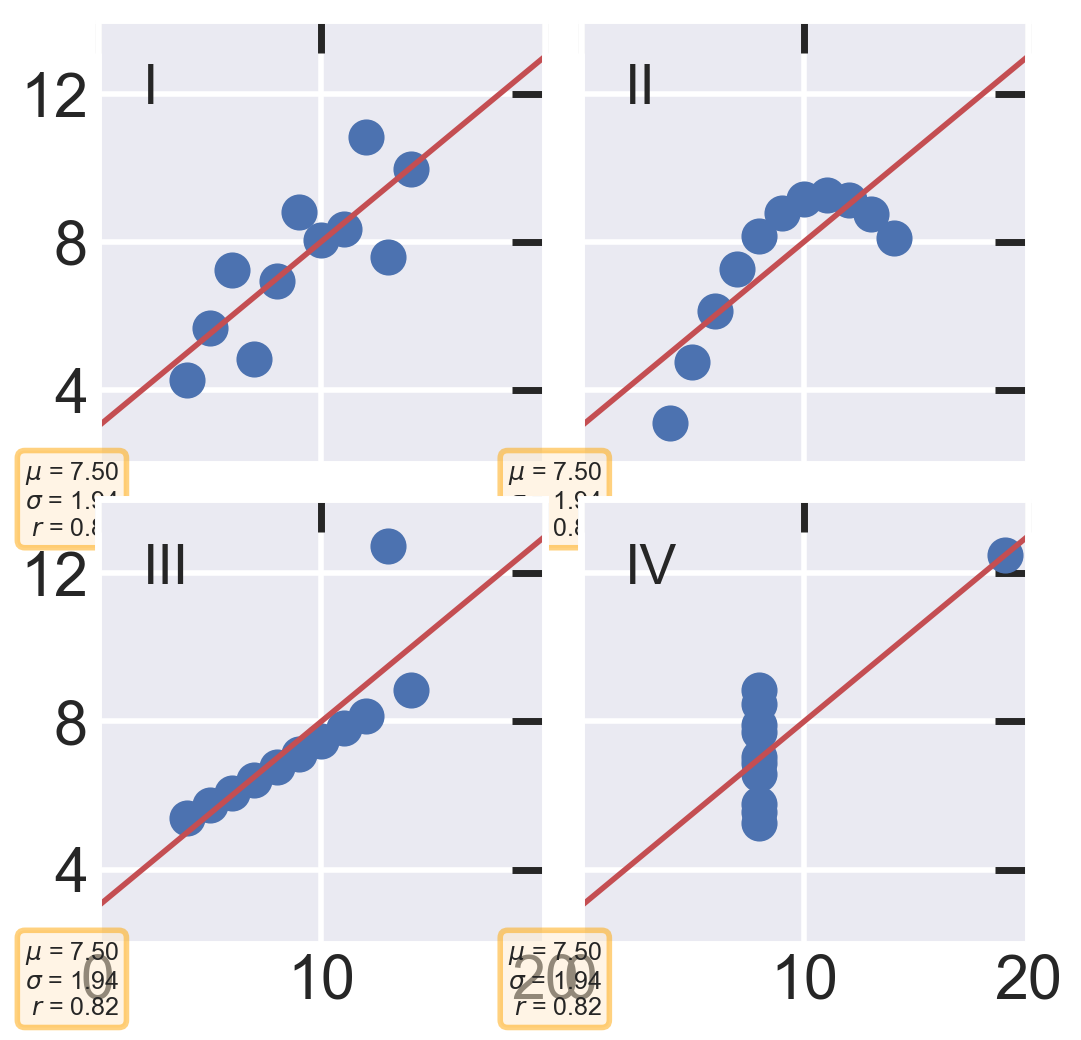

In [83]:
import matplotlib.pyplot as plt
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

In [30]:
def celebration_function(channel):
    channel = np.array(channel)
    if channel.shape == ():
        return result.eval(x=channel).tolist()
    return result.eval(x=channel)

# Detection

real RMB 2 0.9980592524827512
fake RMB 3 0.9981895308887965
Singapore coin 2 0.9973258487177553


,peak_name,peak center,fwhm,area
0,real RMB 1,7.520731,0.177053,1956.519047
1,real RMB 2,8.308976,0.187627,327.125577
2,fake RMB 1,6.447805,0.171814,1160.806349
3,fake RMB 2,7.100400,0.181263,216.257674
4,fake RMB 3,7.518471,0.179235,125.041922
5,Singapore coin 1,8.089188,0.180694,690.539233
6,Singapore coin 2,8.944542,0.192258,112.381150


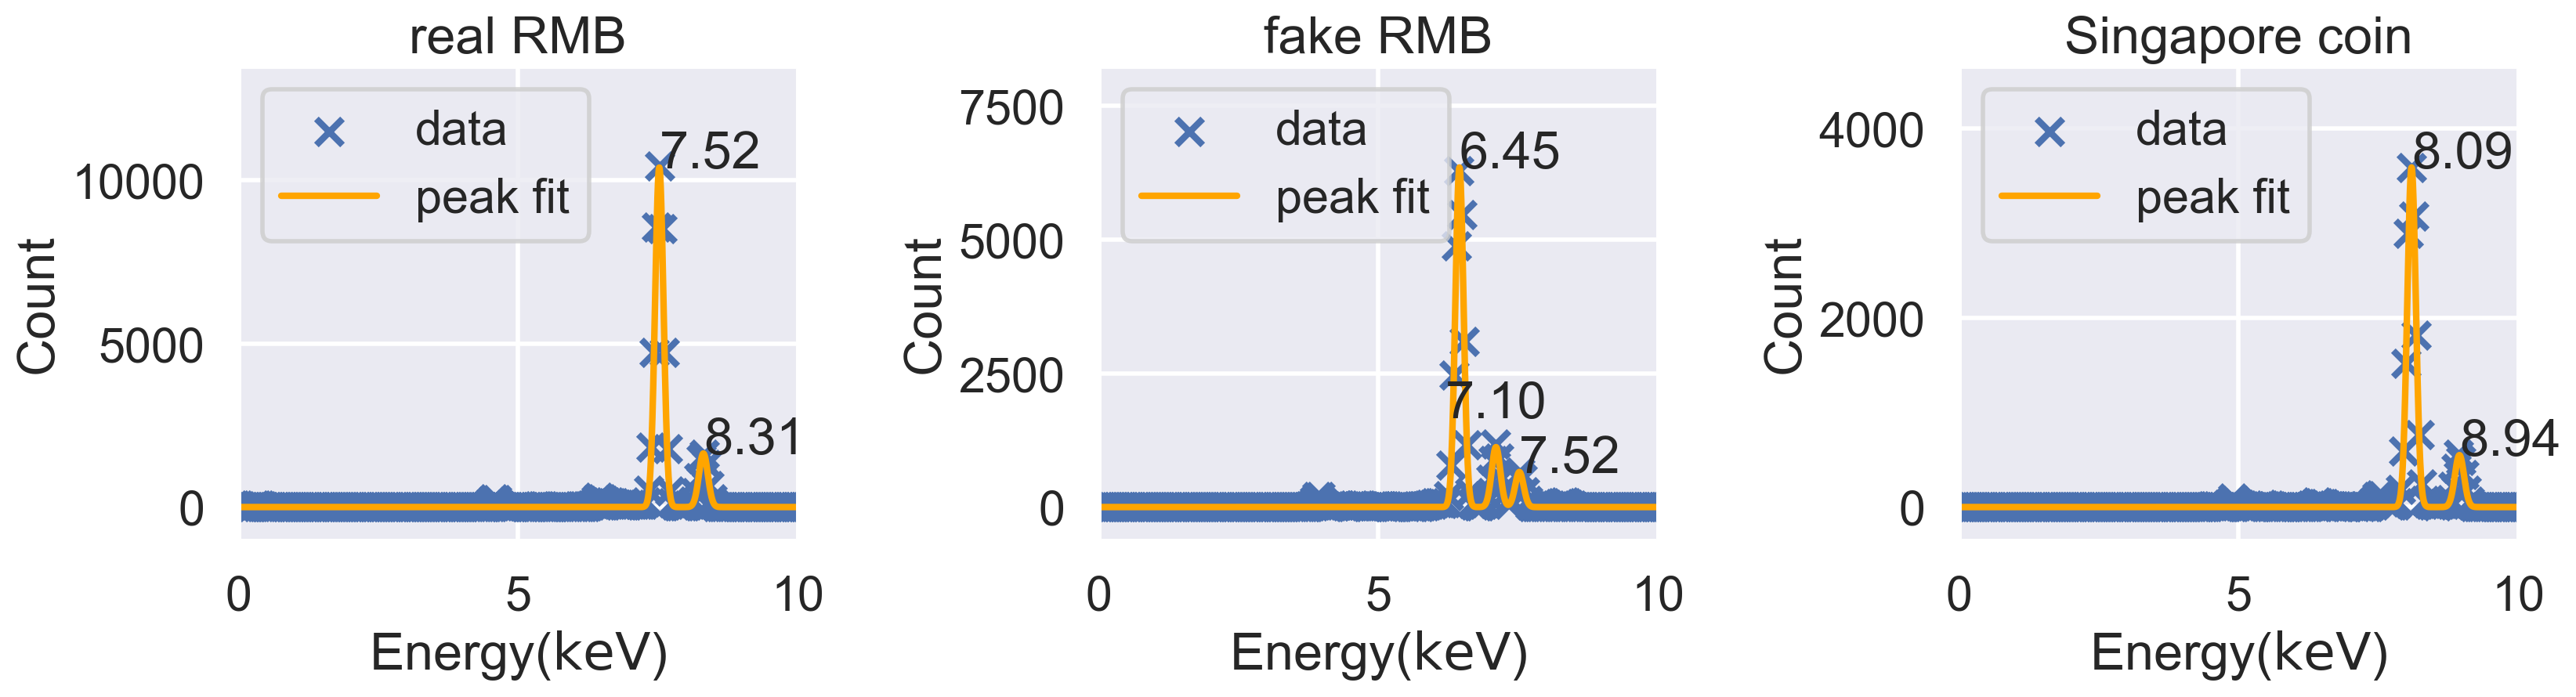

In [111]:
sample = pd.DataFrame({'real RMB':open_mca_data("raw_data/true_rmb.mca"),
                       'fake RMB':open_mca_data("raw_data/false_rmb.mca"),
                       'Singapore coin':open_mca_data("raw_data/singapore_rmb.mca")})
fig,axes = plt.subplots(1,3,figsize=(17,5),sharex=True)
axes = axes.flatten()

xdata = celebration_function(sample.index.values)
ploting_xdata = np.linspace(xdata.min(),xdata.max(),10000)

coin_peak_sets = pd.DataFrame(columns=['peak_name','peak center','fwhm','area'])

for i,(col,ax) in enumerate(zip(sample.columns,axes)):
    # peaks,info = find_peaks(sample[col],prominence=500)
    # print(peaks)
    fit_result,num_peak = peak_fitting(sample[col].values,xdata = xdata,
                                       prominence=500,plotting = False)
    print(col,num_peak,fit_result.summary()['rsquared'])
    # display(fit_result.params)
    ax.scatter(xdata,sample[col].values,marker = 'x',label = 'data')

    ax.plot(ploting_xdata,fit_result.eval(x = ploting_xdata),
            color = 'orange',label = 'peak fit')
    max_height = 0
    for j in range(num_peak):
        if i ==1 and j ==1:
            ax.text(fit_result.params[f'G{j}_center'].value,
                    1.5*fit_result.params[f'G{j}_height'].value,
                    f'{fit_result.params[f'G{j}_center'].value:.2f}',
                    ha = 'center')
        else:
            ax.text(fit_result.params[f'G{j}_center'].value,
                    fit_result.params[f'G{j}_height'].value,
                    f'{fit_result.params[f'G{j}_center'].value:.2f}',
                    ha = 'left')
        if fit_result.params[f'G{j}_height'].value>max_height:
            max_height = fit_result.params[f'G{j}_height'].value
        
        coin_peak_sets.loc[len(coin_peak_sets)] = [f'{col} {j+1}',
                                                   fit_result.params[f'G{j}_center'].value,
                                                   fit_result.params[f'G{j}_fwhm'].value,
                                                   fit_result.params[f'G{j}_amplitude'].value]
    ax.set_ylim(-max_height*0.1,max_height*1.3)
    # display(fit_result.params)
    ax.set_xlabel(r'Energy($\rm keV$)')
    if i == 2:
        ax.set_xlim(0,10)

    ax.set_title(col)
    ax.set_ylabel('Count')
    ax.legend(loc = 'upper left')
fig.tight_layout()
fig.savefig('figs/'+'coin_peak_fitting.pdf')
# fig
coin_peak_sets

In [102]:
lan_convert = lambda x: x.replace('real RMB','真人民币').replace('fake RMB','假人民币').replace('Singapore coin','新加坡币')
header = ['峰名称','峰中心','半高全宽','峰面积']
formatters = {'peak_name':lan_convert,
              'peak center':lambda x: f'{x:.2f}',
              'fwhm':lambda x: f'{x:.2f}',
              'area':lambda x: f'{x:.0f}'}

print(coin_peak_sets.to_latex(index = False,
                              header= header,
                              column_format='c'*len(header),
                              formatters=formatters,
                              caption='样品谱线拟合结果',
                              label='tab:sample_peak_fitting',
                              position='H'))
coin_peak_sets

\begin{table}[H]
\caption{样品谱线拟合结果}
\label{tab:sample_peak_fitting}
\begin{tabular}{cccc}
\toprule
峰名称 & 峰中心 & 半高全宽 & 峰面积 \\
\midrule
真人民币 1 & 7.52 & 0.18 & 1957 \\
真人民币 2 & 8.31 & 0.19 & 327 \\
假人民币 1 & 6.45 & 0.17 & 1161 \\
假人民币 2 & 7.10 & 0.18 & 216 \\
假人民币 3 & 7.52 & 0.18 & 125 \\
新加坡币 1 & 8.09 & 0.18 & 691 \\
新加坡币 2 & 8.94 & 0.19 & 112 \\
\bottomrule
\end{tabular}
\end{table}



,peak_name,peak center,fwhm,area
0,real RMB 1,7.520731,0.177053,1956.519047
1,real RMB 2,8.308976,0.187627,327.125577
2,fake RMB 1,6.447805,0.171814,1160.806349
3,fake RMB 2,7.100400,0.181263,216.257674
4,fake RMB 3,7.518471,0.179235,125.041922
5,Singapore coin 1,8.089188,0.180694,690.539233
6,Singapore coin 2,8.944542,0.192258,112.381150


In [33]:
from roentgen.lines import get_lines
import astropy.units as u
formatters = {'energy':lambda x: f'{x:.0f}'}
header = [r'能量(\unit{{eV}})','Z','元素','谱线名','相对强度']

print('----------------------------------')
for i in range(len(coin_peak_sets)):
    title = f'峰名称:{lan_convert(coin_peak_sets['peak_name'][i])};'+\
        f'峰中心:{coin_peak_sets['peak center'][i]:.2f};'+\
            f'半高全宽:{coin_peak_sets['fwhm'][i]:.2f};'+\
                f'峰面积:{coin_peak_sets['area'][i]:.0f}'
    ene_low = (coin_peak_sets['peak center'][i] - coin_peak_sets['fwhm'][i]/2)*u.keV
    ene_high = (coin_peak_sets['peak center'][i] + coin_peak_sets['fwhm'][i]/2)*u.keV
    coin_xray = get_lines(ene_low, ene_high).to_pandas().reset_index()
    print(coin_xray.to_latex(header = header,
                             index = False,
                             formatters = formatters,
                             column_format='c'*len(header),
                             caption=title,
                             label=f'tab:{coin_peak_sets['peak_name'][i]}',
                             position = 'H'))
    display(coin_xray)
    print('----------------------------------')


----------------------------------
\begin{table}[H]
\caption{峰名称:真人民币 1;峰中心:7.52;半高全宽:0.18;峰面积:1957}
\label{tab:real RMB 1}
\begin{tabular}{ccccc}
\toprule
能量(\unit{eV}) & Z & 元素 & 谱线名 & 相对强度 \\
\midrule
7461 & 28 & Ni & Kα2 & 51 \\
7478 & 28 & Ni & Kα1 & 100 \\
7480 & 63 & Eu & Lγ1 & 10 \\
7525 & 67 & Ho & Lβ1 & 64 \\
7604 & 75 & Re & Ll & 5 \\
7605 & 71 & Lu & Lα2 & 11 \\
\bottomrule
\end{tabular}
\end{table}



,energy,z,symbol,transition,intensity
0,7460.9,28,Ni,Kα2,51
1,7478.2,28,Ni,Kα1,100
2,7480.3,63,Eu,Lγ1,10
3,7525.3,67,Ho,Lβ1,64
4,7603.6,75,Re,Ll,5
5,7604.9,71,Lu,Lα2,11


----------------------------------
\begin{table}[H]
\caption{峰名称:真人民币 2;峰中心:8.31;半高全宽:0.19;峰面积:327}
\label{tab:real RMB 2}
\begin{tabular}{ccccc}
\toprule
能量(\unit{eV}) & Z & 元素 & 谱线名 & 相对强度 \\
\midrule
8265 & 28 & Ni & Kβ1,3 & 17 \\
8268 & 78 & Pt & Ll & 5 \\
8335 & 74 & W & Lα2 & 11 \\
8398 & 74 & W & Lα1 & 100 \\
8402 & 70 & Yb & Lβ1 & 65 \\
\bottomrule
\end{tabular}
\end{table}



,energy,z,symbol,transition,intensity
0,8264.7,28,Ni,"Kβ1,3",17
1,8268.0,78,Pt,Ll,5
2,8335.2,74,W,Lα2,11
3,8397.6,74,W,Lα1,100
4,8401.8,70,Yb,Lβ1,65


----------------------------------
\begin{table}[H]
\caption{峰名称:假人民币 1;峰中心:6.45;半高全宽:0.17;峰面积:1161}
\label{tab:fake RMB 1}
\begin{tabular}{ccccc}
\toprule
能量(\unit{eV}) & Z & 元素 & 谱线名 & 相对强度 \\
\midrule
6391 & 26 & Fe & Kα2 & 50 \\
6404 & 26 & Fe & Kα1 & 100 \\
6456 & 63 & Eu & Lβ1 & 62 \\
6458 & 66 & Dy & Lα2 & 11 \\
6490 & 25 & Mn & Kβ1,3 & 17 \\
6495 & 66 & Dy & Lα1 & 100 \\
\bottomrule
\end{tabular}
\end{table}



,energy,z,symbol,transition,intensity
0,6390.8,26,Fe,Kα2,50
1,6403.8,26,Fe,Kα1,100
2,6456.4,63,Eu,Lβ1,62
3,6457.7,66,Dy,Lα2,11
4,6490.4,25,Mn,"Kβ1,3",17
5,6495.2,66,Dy,Lα1,100


----------------------------------
\begin{table}[H]
\caption{峰名称:假人民币 2;峰中心:7.10;半高全宽:0.18;峰面积:216}
\label{tab:fake RMB 2}
\begin{tabular}{ccccc}
\toprule
能量(\unit{eV}) & Z & 元素 & 谱线名 & 相对强度 \\
\midrule
7058 & 26 & Fe & Kβ1,3 & 17 \\
7103 & 64 & Gd & Lβ2,15 & 21 \\
7133 & 69 & Tm & Lα2 & 11 \\
7173 & 73 & Ta & Ll & 5 \\
7178 & 62 & Sm & Lγ1 & 10 \\
7180 & 69 & Tm & Lα1 & 100 \\
\bottomrule
\end{tabular}
\end{table}



,energy,z,symbol,transition,intensity
0,7058.0,26,Fe,"Kβ1,3",17
1,7102.8,64,Gd,"Lβ2,15",21
2,7133.1,69,Tm,Lα2,11
3,7173.1,73,Ta,Ll,5
4,7178.0,62,Sm,Lγ1,10
5,7179.9,69,Tm,Lα1,100


----------------------------------
\begin{table}[H]
\caption{峰名称:假人民币 3;峰中心:7.52;半高全宽:0.18;峰面积:125}
\label{tab:fake RMB 3}
\begin{tabular}{ccccc}
\toprule
能量(\unit{eV}) & Z & 元素 & 谱线名 & 相对强度 \\
\midrule
7461 & 28 & Ni & Kα2 & 51 \\
7478 & 28 & Ni & Kα1 & 100 \\
7480 & 63 & Eu & Lγ1 & 10 \\
7525 & 67 & Ho & Lβ1 & 64 \\
7604 & 75 & Re & Ll & 5 \\
7605 & 71 & Lu & Lα2 & 11 \\
\bottomrule
\end{tabular}
\end{table}



,energy,z,symbol,transition,intensity
0,7460.9,28,Ni,Kα2,51
1,7478.2,28,Ni,Kα1,100
2,7480.3,63,Eu,Lγ1,10
3,7525.3,67,Ho,Lβ1,64
4,7603.6,75,Re,Ll,5
5,7604.9,71,Lu,Lα2,11


----------------------------------
\begin{table}[H]
\caption{峰名称:新加坡币 1;峰中心:8.09;半高全宽:0.18;峰面积:691}
\label{tab:Singapore coin 1}
\begin{tabular}{ccccc}
\toprule
能量(\unit{eV}) & Z & 元素 & 谱线名 & 相对强度 \\
\midrule
8028 & 29 & Cu & Kα2 & 51 \\
8046 & 77 & Ir & Ll & 5 \\
8048 & 29 & Cu & Kα1 & 100 \\
8088 & 73 & Ta & NaN & 11 \\
8101 & 69 & Tm & Lβ1 & 64 \\
8102 & 65 & Tb & Lγ1 & 11 \\
8146 & 73 & Ta & Lα1 & 100 \\
\bottomrule
\end{tabular}
\end{table}



,energy,z,symbol,transition,intensity
0,8027.8,29,Cu,Kα2,51
1,8045.8,77,Ir,Ll,5
2,8047.8,29,Cu,Kα1,100
3,8087.9,73,Ta,NaN,11
4,8101.0,69,Tm,Lβ1,64
5,8102.0,65,Tb,Lγ1,11
6,8146.1,73,Ta,Lα1,100


----------------------------------
\begin{table}[H]
\caption{峰名称:新加坡币 2;峰中心:8.95;半高全宽:0.19;峰面积:112}
\label{tab:Singapore coin 2}
\begin{tabular}{ccccc}
\toprule
能量(\unit{eV}) & Z & 元素 & 谱线名 & 相对强度 \\
\midrule
8905 & 29 & Cu & Kβ1,3 & 17 \\
8912 & 76 & Os & Lα1 & 100 \\
8953 & 81 & Tl & Ll & 6 \\
9023 & 72 & Hf & Lβ1 & 67 \\
\bottomrule
\end{tabular}
\end{table}



,energy,z,symbol,transition,intensity
0,8905.3,29,Cu,"Kβ1,3",17
1,8911.7,76,Os,Lα1,100
2,8953.2,81,Tl,Ll,6
3,9022.7,72,Hf,Lβ1,67


----------------------------------
